In [1]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
import scipy.ndimage
import skimage.color
import skimage.feature
import sklearn.ensemble
from matplotlib.colors import LinearSegmentedColormap
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from copy import copy, deepcopy

C:\Users\hiltp_000\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def get_adjacency_mat(x_data):
    n = len(x_data)
    mat = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if j != 0 and j-i == 0:
                mat[i][j-1] = 1
            if j != n-1 and j-i == 0:
                mat[i][j+1] = 1
    return mat

def get_degree_mat(x_data):
    n = len(x_data)
    mat = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if j != 0 and j!=n and j-i == 0:
                mat[i][j] = 2
            if (j == 0 or j == n-1) and j-i == 0:
                mat[i][j] = 1
    return mat   

def set_nonzero_offDiag_entries_1(Q, const_val):
    n = Q.shape[0]
    for i in range(n):
        for j in range(n):
            if j != 0 and j-i == 0:
                Q[i][j-1] = const_val
            if j != n-1 and j-i == 0:
                Q[i][j+1] = const_val
    return

def set_nonzero_offDiag_entries_2(Q, x_data, gamma):
    n = Q.shape[0]
    for i in range(n):
        for j in range(n):
            if j != 0 and j-i == 0:
                diag_val = np.exp(-gamma * np.power((x_data[j-1]-x_data[j]),2))
                Q[i][j-1] = diag_val
            if j != n-1 and j-i == 0:
                diag_val = np.exp(-gamma * np.power((x_data[j]-x_data[j+1]),2))
                Q[i][j+1] = diag_val
    return

First part of Q:
[[1. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 2.]]
Second part of Q:
[[2. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 1.]]

First part of covariance matrix:
[[1.  0.  0.  0. ]
 [0.  0.5 0.  0. ]
 [0.  0.  0.5 0. ]
 [0.  0.  0.  0.5]]
Second part of covariance matrix:
[[0.5 0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0. ]
 [0.  0.  0.5 0.  0. ]
 [0.  0.  0.  0.5 0. ]
 [0.  0.  0.  0.  1. ]]


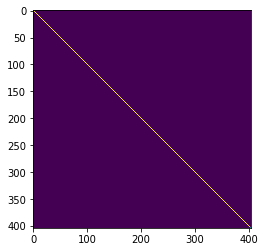

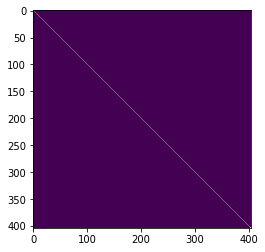

In [3]:
#EX2a)
x_data = np.load('fn.npy')

# there are only two off diagonals (k-1) and (k+1) with k as the main diagonal that have non-zero entries.
# If those entries have a non-zero value the matrix Q is a singular matrix wich no inverse can be build from.
# To avoid to get a singular matrix the non-zero off-diagonals are set to 0.
# The main diagonal consists of the diagonal of the degree matrix, which defines, how many vertices each node owns.
# That is one vertice for the first and the last node and 2 for the ones in between since we have a chain structure.
off_diag_const_val = 0
n = len(x_data)
gamma = 0.1

W = get_adjacency_mat(x_data)
D = get_degree_mat(x_data)
Q = np.subtract(D, W)
set_nonzero_offDiag_entries_1(Q, off_diag_const_val)
cov_mat = np.linalg.inv(Q)

# Print first and last part of matrix diagonal and close surroundinf off-diagonals
print('First part of Q:')
print(Q[0:4,0:4])
print('Second part of Q:')
print(Q[n-4:n,n-4:n])

print('\nFirst part of covariance matrix:')
print(cov_mat[0:4,0:4])
print('Second part of covariance matrix:')
print(cov_mat[n-5:n,n-5:n])

# plot both matrices
plt.figure()
plt.imshow(Q)

plt.figure()
plt.imshow(cov_mat)

First part of Q:
[[1.         0.99999206 0.         0.        ]
 [0.99999206 2.         0.9999154  0.        ]
 [0.         0.9999154  2.         0.99993417]
 [0.         0.         0.99993417 2.        ]]
Second part of Q:
[[2.         0.999999   0.         0.        ]
 [0.999999   2.         0.99998288 0.        ]
 [0.         0.99998288 2.         0.99999366]
 [0.         0.         0.99999366 1.        ]]

First part of covariance matrix:
[[ 8.1686575  -7.16871439  6.16935806 -5.17094866]
 [-7.16871439  7.16877128 -6.16940702  5.17098969]
 [ 6.16935806 -6.16940702  6.17002695 -5.1715093 ]
 [-5.17094866  5.17098969 -5.1715093   5.17280694]]
Second part of covariance matrix:
[[ 150.33827955 -150.32977405  150.32256956 -150.3180893   150.31713617]
 [-150.32977405  151.3212201  -151.3139681   151.3094583  -151.30849888]
 [ 150.32256956 -151.3139681   152.30666951 -152.30213013  152.30116441]
 [-150.3180893   151.3094583  -152.30213013  153.29757819 -153.29660616]
 [ 150.31713617 -151.3

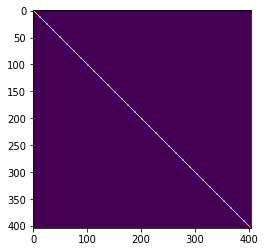

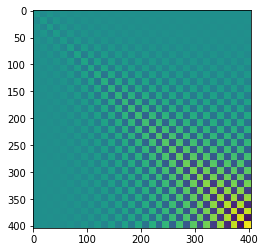

In [4]:
#EX2b)
x_data = np.load('fn.npy')

gamma = 0.1
n = len(x_data)

W = get_adjacency_mat(x_data)
D = get_degree_mat(x_data)
Q = np.subtract(D, W)

set_nonzero_offDiag_entries_2(Q, x_data, gamma)
cov_mat = np.linalg.inv(Q)

# Print first and last part of matrix diagonal and close surroundinf off-diagonals
print('First part of Q:')
print(Q[0:4,0:4])
print('Second part of Q:')
print(Q[n-4:n,n-4:n])

print('\nFirst part of covariance matrix:')
print(cov_mat[0:4,0:4])
print('Second part of covariance matrix:')
print(cov_mat[n-5:n,n-5:n])

# plot both matrices
plt.figure()
plt.imshow(Q)

plt.figure()
plt.imshow(cov_mat)  # this shows nicely how the smoothing term acts

Text(0.5,0,'index')

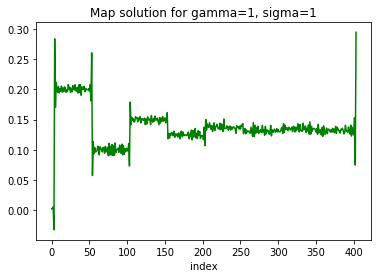

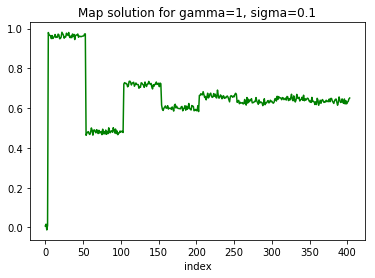

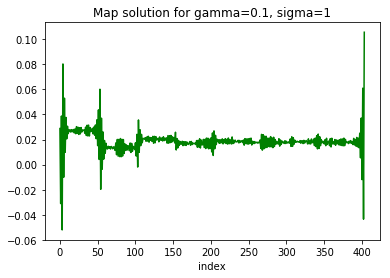

In [17]:
#EX2c)

def get_map(x_data, gamma, variance):
    # To find the minimum of the energy-function with respect to z, need to derive it, set the derivative to 0 and solve for z.
    # The derivative is: (1/(sigma^2)*I+Q)*(z)-1/(sigma^2)*(x)=0   =>   z=1/(sigma^2)*(x)*(1/(sigma^2)*I+Q)^(-1)
    W = get_adjacency_mat(x_data)
    D = get_degree_mat(x_data)
    Q = np.subtract(D, W)
    I = np.identity(n)

    set_nonzero_offDiag_entries_2(Q, x_data, gamma)

    tmp1 = np.add(1/variance * I, Q)
    tmp1_inv = np.linalg.inv(tmp1)
    tmp2 = 1/variance * x_data
    z = tmp1_inv.dot(tmp2)

    return z

x_data = np.load('fn.npy')

n = len(x_data)
gamma = 1
sigma = 1
variance = np.power(sigma,2)

z = get_map(x_data, gamma, variance)
plt.figure()
plt.plot(z, color='green')
plt.title('Map solution for gamma=1, sigma=1')
plt.xlabel('z')
plt.xlabel('index')

gamma = 1
sigma = 0.1
variance = np.power(sigma,2)

z = get_map(x_data, gamma, variance)
plt.figure()
plt.plot(z, color='green')
plt.title('Map solution for gamma=1, sigma=0.1')
plt.xlabel('z')
plt.xlabel('index')

gamma = 0.1
sigma = 3
variance = np.power(sigma,2)

z = get_map(x_data, gamma, variance)
plt.figure()
plt.plot(z, color='green')
plt.title('Map solution for gamma=0.1, sigma=3')
plt.xlabel('z')
plt.xlabel('index')

# the term that gamma is scaling is a smoothnessterm, meaning that a higher gamma supresses high variances of z.
# Since sigma is closely related to the variance, it defines how much z varies with respect to its direct neighbors.
# Thus, sigma and gamma are having contrary effects. A high sigma increases noise whereas a high gamma increases smoothing.